<a href="https://colab.research.google.com/github/Hiszat/Data-Sains/blob/main/Pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

TWEET_DATA = pd.read_csv("/content/drive/MyDrive/DataSains/bakso - bakso.csv")

TWEET_DATA.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Mar 19 10:59:20 +0000 2024,1770042367535407557,@bogorshorthair Blm aja liat ttw dan lemaknya 😭😭,0,0,0,0,in,1531569481310298112,1770027725660828092,maguririy,https://twitter.com/maguririy/status/177004236...
1,Tue Mar 19 10:59:12 +0000 2024,1770042332206809557,@ssefnum makan bakso sambil nonton softball wkwk,0,0,0,0,in,3131575871,1770040337429373203,sumdn,https://twitter.com/sumdn/status/1770042332206...
2,Tue Mar 19 10:58:56 +0000 2024,1770042265945194513,Just fell on my knees at warung bakso malang h...,0,0,0,0,en,1581253240427253761,1770042265945194513,venomsuperstars,https://twitter.com/venomsuperstars/status/177...
3,Tue Mar 19 10:58:41 +0000 2024,1770042203466805372,puasa war takjil ❌ puasa beneran war ✅ abis be...,0,0,0,0,in,1676290639787614209,1770042203466805372,masicayoo,https://twitter.com/masicayoo/status/177004220...
4,Tue Mar 19 10:58:40 +0000 2024,1770042196365869345,@StoryofAzelia BAKSO MALANG YA.. enak deh lagi...,0,0,0,0,in,859318176365948928,1766765499525025956,Etinchelant,https://twitter.com/Etinchelant/status/1770042...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TWEET_DATA['full_text'] = TWEET_DATA['full_text'].str.lower()

print('Case folding Result : \n')
print(TWEET_DATA['full_text'].head(5))
print('\n\n\n')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenizing Result:

0                   [blm, aja, liat, ttw, dan, lemaknya]
1         [makan, bakso, sambil, nonton, softball, wkwk]
2      [just, fell, on, my, knees, at, warung, bakso,...
3      [puasa, war, takjil, puasa, beneran, war, abis...
4      [bakso, malang, ya, enak, deh, lagi, dingin, g...
                             ...                        
600                                         [goo, mdrrr]
601    [engga, nder, selagi, air, ludah, belum, kelua...
602                                        [yang, atass]
603    [knapa, ya, mie, ayam, sama, bakso, itu, udah,...
604             [masih, muda, aku, ngejar, gaji, tinggi]
Name: tweet_tokens, Length: 605, dtype: object




Frequency Token:

[[('blm', 1), ('aja', 1), ('liat', 1), ('ttw', 1), ('dan', 1), ('lemaknya', 1)], [('makan', 1), ('bakso', 1), ('sambil', 1), ('nonton', 1), ('softball', 1), ('wkwk', 1)], [('just', 1), ('fell', 1), ('on', 1), ('my', 1), ('knees', 1), ('at', 1), ('warung', 1), ('bakso', 1), ('malang',

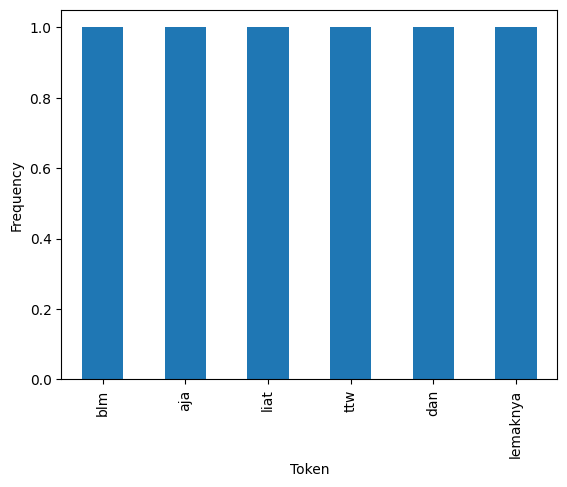

In [ ]:
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_tweet_special(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

TWEET_DATA['full_text'] = [remove_tweet_special(text) for text in TWEET_DATA['full_text']]

def remove_number(text):
    return re.sub(r"\d+", "", text)

TWEET_DATA['full_text'] = [remove_number(text) for text in TWEET_DATA['full_text']]

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

TWEET_DATA['full_text'] = [remove_punctuation(text) for text in TWEET_DATA['full_text']]

def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['full_text'] = [remove_whitespace_LT(text) for text in TWEET_DATA['full_text']]

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['full_text'] = [remove_single_char(text) for text in TWEET_DATA['full_text']]

def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = [word_tokenize_wrapper(text) for text in TWEET_DATA['full_text']]

print('Tokenizing Result:\n')
print(TWEET_DATA['tweet_tokens'])
print('\n\n\n')

def freqDist_Wrapper(text):
    return FreqDist(text)

TWEET_DATA['tweet_tokens_fdist'] = [freqDist_Wrapper(tokens) for tokens in TWEET_DATA['tweet_tokens']]
print('Frequency Token:\n')
print([fdist.most_common() for fdist in TWEET_DATA['tweet_tokens_fdist']])

# Ubah FreqDist menjadi DataFrame
df = pd.DataFrame(TWEET_DATA['tweet_tokens_fdist'][0].items(), columns=['Token', 'Frequency'])

# Sorting data berdasarkan frekuensi
df = df.sort_values(by='Frequency', ascending=False)

# Ubah nilai frekuensi menjadi numerik
df['Frequency'] = pd.to_numeric(df['Frequency'], errors='coerce')

# Hapus baris dengan nilai NaN (Not a Number)
df = df.dropna(subset=['Frequency'])

# Ubah nilai frekuensi menjadi indeks dan token sebagai nilai dalam Series
freq_series = pd.Series(df['Frequency'].values, index=df['Token'])

# Plotting
freq_series.head(30).plot(kind='bar')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg","dg", "rt", "dgn", "ny", "d", "klo",
                       "kalo", "amp","biar","bikin", "bilang",
                       "gak", "ga", "krn","nya","nih", "sih",
                       "si", "tau", "tdk", "tuh", "utk", "ya",
                       "jd","jgn","sdh","aja","n","t",
                       "nyg","hehe","pen","u","nan","loh","rt",
                       "&amp","yah", "blm", "knp", "knpa"])

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal)


print(TWEET_DATA['tweet_tokens_WSW'].head())

0                                [liat, ttw, lemaknya]
1               [makan, bakso, nonton, softball, wkwk]
2    [just, fell, on, my, knees, at, warung, bakso,...
3    [puasa, war, takjil, puasa, beneran, war, abis...
4             [bakso, malang, enak, deh, dingin, gini]
Name: tweet_tokens_WSW, dtype: object


In [ ]:
normalizad_word = pd.read_excel("/content/drive/MyDrive/DataSains/normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

0                                  [lihat, ttw, lemak]
1               [makan, bakso, nonton, softball, wkwk]
2    [just, fell, on, my, knees, at, warung, bakso,...
3    [puasa, war, takjil, puasa, beneran, war, habi...
4           [bakso, malang, enak, deh, dingin, begini]
5    [hari, menu, berbuka, puasa, oseng, janggel, b...
6                               [bakso, urat, menarik]
7          [ya Allah, saya, bakso, jumbo, besar, helm]
8    [ngidam, bakso, sempat, beli, mama, terus, pas...
9    [sblm, dikasih, sambel, bening, seperti, kuah,...
Name: tweet_normalized, dtype: object

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DataSains/alaytobaku - alaytobaku.csv")
alay_to_baku =  dict(zip(df['alay'], df['baku']))

def replace_alay_with_baku(word_list):
  new_words = []
  for word in word_list:
    if word.lower() in alay_to_baku:
      new_words.append(alay_to_baku[word.lower()])
    else:
      new_words.append(word)
  return new_words

TWEET_DATA['tweet_baku'] = TWEET_DATA['tweet_tokens'].apply(replace_alay_with_baku)

TWEET_DATA['tweet_baku'].head(10)

0             [belum, saja, lihat, ttw, dan, lemaknya]
1     [makan, bakso, sambil, menonton, softball, wkwk]
2    [just, fell, on, my, knees, at, warung, bakso,...
3    [puasa, war, takjil, puasa, benaran, war, habi...
4    [bakso, malang, ya, enak, deh, lagi, dingin, b...
5    [day, menu, berbuka, puasa, oseng, janggel, ba...
6                               [bakso, urat, menarik]
7      [yaallah, gue, mau, bakso, jumbo, segede, helm]
8    [tadi, mengidam, bakso, tapi, enggak, sempat, ...
9    [kan, sebelum, dikasih, sambel, mereka, bening...
Name: tweet_baku, dtype: object

In [ ]:
!pip3 install swifter
!pip3 install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=70bbd63f4b07575fea6dfd34f476e3ae27729afb59922f4624a241e41a3058d4
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
TWEET_DATA.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_baku
0,Tue Mar 19 10:59:20 +0000 2024,1770042367535407557,blm aja liat ttw dan lemaknya,0,0,0,0,in,1531569481310298112,1770027725660828092,maguririy,https://twitter.com/maguririy/status/177004236...,"[blm, aja, liat, ttw, dan, lemaknya]","{'blm': 1, 'aja': 1, 'liat': 1, 'ttw': 1, 'dan...","[liat, ttw, lemaknya]","[lihat, ttw, lemak]","[belum, saja, lihat, ttw, dan, lemaknya]"
1,Tue Mar 19 10:59:12 +0000 2024,1770042332206809557,makan bakso sambil nonton softball wkwk,0,0,0,0,in,3131575871,1770040337429373203,sumdn,https://twitter.com/sumdn/status/1770042332206...,"[makan, bakso, sambil, nonton, softball, wkwk]","{'makan': 1, 'bakso': 1, 'sambil': 1, 'nonton'...","[makan, bakso, nonton, softball, wkwk]","[makan, bakso, nonton, softball, wkwk]","[makan, bakso, sambil, menonton, softball, wkwk]"
2,Tue Mar 19 10:58:56 +0000 2024,1770042265945194513,just fell on my knees at warung bakso malang,0,0,0,0,en,1581253240427253761,1770042265945194513,venomsuperstars,https://twitter.com/venomsuperstars/status/177...,"[just, fell, on, my, knees, at, warung, bakso,...","{'just': 1, 'fell': 1, 'on': 1, 'my': 1, 'knee...","[just, fell, on, my, knees, at, warung, bakso,...","[just, fell, on, my, knees, at, warung, bakso,...","[just, fell, on, my, knees, at, warung, bakso,..."
3,Tue Mar 19 10:58:41 +0000 2024,1770042203466805372,puasa war takjil puasa beneran war abis bera...,0,0,0,0,in,1676290639787614209,1770042203466805372,masicayoo,https://twitter.com/masicayoo/status/177004220...,"[puasa, war, takjil, puasa, beneran, war, abis...","{'puasa': 2, 'war': 2, 'takjil': 1, 'beneran':...","[puasa, war, takjil, puasa, beneran, war, abis...","[puasa, war, takjil, puasa, beneran, war, habi...","[puasa, war, takjil, puasa, benaran, war, habi..."
4,Tue Mar 19 10:58:40 +0000 2024,1770042196365869345,bakso malang ya enak deh lagi dingin gini,0,0,0,0,in,859318176365948928,1766765499525025956,Etinchelant,https://twitter.com/Etinchelant/status/1770042...,"[bakso, malang, ya, enak, deh, lagi, dingin, g...","{'bakso': 1, 'malang': 1, 'ya': 1, 'enak': 1, ...","[bakso, malang, enak, deh, dingin, gini]","[bakso, malang, enak, deh, dingin, begini]","[bakso, malang, ya, enak, deh, lagi, dingin, b..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":", term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['tweet_tokens_stemmed'])

2068
------------------------
lihat : lihat
ttw : ttw
lemak : lemak
makan : makan
bakso : bakso
nonton : nonton
softball : softball
wkwk : wkwk
just : just
fell : fell
on : on
my : my
knees : knees
at : at
warung : warung
malang : malang
puasa : puasa
war : war
takjil : takjil
beneran : beneran
habis : habis
berantem : antem
sama : sama
mba : mba
gara : gara
ngantri : ngantri
enak : enak
deh : deh
dingin : dingin
begini : begini
hari : hari
menu : menu
berbuka : buka
oseng : oseng
janggel : janggel
mendoan : mendoan
sambel : sambel
bawang : bawang
ibu : ibu
rudy : rudy
urat : urat
menarik : tarik
ya Allah : ya allah
saya : saya
jumbo : jumbo
besar : besar
helm : helm
ngidam : ngidam
sempat : sempat
beli : beli
mama : mama
terus : terus
pas : pas
sudah : sudah
sampai : sampai
rumah : rumah
mami : mami
sblm : sblm
dikasih : kasih
bening : bening
seperti : seperti
kuah : kuah
ayang : ayang
sate : sate
mie : mie
ayam : ayam
batagor siomay : batagor siomay
karedok : karedok
seblak : seblak


Pandas Apply:   0%|          | 0/605 [00:00<?, ?it/s]

0                                    [lihat, ttw, lemak]
1                 [makan, bakso, nonton, softball, wkwk]
2      [just, fell, on, my, knees, at, warung, bakso,...
3      [puasa, war, takjil, puasa, beneran, war, habi...
4             [bakso, malang, enak, deh, dingin, begini]
                             ...                        
600                                         [goo, mdrrr]
601    [engga, nder, selagi, air, ludah, bibir, konta...
602                                              [atass]
603    [knapa, mie, ayam, bakso, sudah, kaya, makan, ...
604                                 [muda, ngejar, gaji]
Name: tweet_tokens_stemmed, Length: 605, dtype: object


In [ ]:
TWEET_DATA.to_csv("Text_Preprocessing.csv")

In [ ]:
TWEET_DATA.to_excel("Text_Preprocessing.xlsx")

In [ ]:
tweets = pd.read_csv("/content/Text_Preprocessing.csv")

for i, text in enumerate(tweets['tweet_baku']):
  tweets['tweet_baku'][i] = tweets['tweet_baku'][i].replace("'", "").replace(',','').replace(']','').replace('[','')

  list_words=[]
  for word in tweets['tweet_baku'][i].split():
    list_words.append(word)

  tweets['tweet_baku'][i] = list_words

tweets

Streaming output truncated to the last 5000 lines.
<ipython-input-15-6234bf7c1e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_baku'][i] = tweets['tweet_baku'][i].replace("'", "").replace(',','').replace(']','').replace('[','')
<ipython-input-15-6234bf7c1e34>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_baku'][i] = list_words
<ipython-input-15-6234bf7c1e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_baku,tweet_tokens_stemmed
0,0,Tue Mar 19 10:59:20 +0000 2024,1770042367535407557,blm aja liat ttw dan lemaknya,0,0,0,0,in,1531569481310298112,1770027725660828092,maguririy,https://twitter.com/maguririy/status/177004236...,"['blm', 'aja', 'liat', 'ttw', 'dan', 'lemaknya']",<FreqDist with 6 samples and 6 outcomes>,"['liat', 'ttw', 'lemaknya']","['lihat', 'ttw', 'lemak']","[belum, saja, lihat, ttw, dan, lemaknya]","['lihat', 'ttw', 'lemak']"
1,1,Tue Mar 19 10:59:12 +0000 2024,1770042332206809557,makan bakso sambil nonton softball wkwk,0,0,0,0,in,3131575871,1770040337429373203,sumdn,https://twitter.com/sumdn/status/1770042332206...,"['makan', 'bakso', 'sambil', 'nonton', 'softba...",<FreqDist with 6 samples and 6 outcomes>,"['makan', 'bakso', 'nonton', 'softball', 'wkwk']","['makan', 'bakso', 'nonton', 'softball', 'wkwk']","[makan, bakso, sambil, menonton, softball, wkwk]","['makan', 'bakso', 'nonton', 'softball', 'wkwk']"
2,2,Tue Mar 19 10:58:56 +0000 2024,1770042265945194513,just fell on my knees at warung bakso malang,0,0,0,0,en,1581253240427253761,1770042265945194513,venomsuperstars,https://twitter.com/venomsuperstars/status/177...,"['just', 'fell', 'on', 'my', 'knees', 'at', 'w...",<FreqDist with 9 samples and 9 outcomes>,"['just', 'fell', 'on', 'my', 'knees', 'at', 'w...","['just', 'fell', 'on', 'my', 'knees', 'at', 'w...","[just, fell, on, my, knees, at, warung, bakso,...","['just', 'fell', 'on', 'my', 'knees', 'at', 'w..."
3,3,Tue Mar 19 10:58:41 +0000 2024,1770042203466805372,puasa war takjil puasa beneran war abis bera...,0,0,0,0,in,1676290639787614209,1770042203466805372,masicayoo,https://twitter.com/masicayoo/status/177004220...,"['puasa', 'war', 'takjil', 'puasa', 'beneran',...",<FreqDist with 11 samples and 15 outcomes>,"['puasa', 'war', 'takjil', 'puasa', 'beneran',...","['puasa', 'war', 'takjil', 'puasa', 'beneran',...","[puasa, war, takjil, puasa, benaran, war, habi...","['puasa', 'war', 'takjil', 'puasa', 'beneran',..."
4,4,Tue Mar 19 10:58:40 +0000 2024,1770042196365869345,bakso malang ya enak deh lagi dingin gini,0,0,0,0,in,859318176365948928,1766765499525025956,Etinchelant,https://twitter.com/Etinchelant/status/1770042...,"['bakso', 'malang', 'ya', 'enak', 'deh', 'lagi...",<FreqDist with 8 samples and 8 outcomes>,"['bakso', 'malang', 'enak', 'deh', 'dingin', '...","['bakso', 'malang', 'enak', 'deh', 'dingin', '...","[bakso, malang, ya, enak, deh, lagi, dingin, b...","['bakso', 'malang', 'enak', 'deh', 'dingin', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,Tue Mar 19 05:11:18 +0000 2024,1769954779453616541,goo mdrrr,0,0,0,0,und,1675489739162673152,1769874851118960767,zobaknrv,https://twitter.com/zobaknrv/status/1769954779...,"['goo', 'mdrrr']",<FreqDist with 2 samples and 2 outcomes>,"['goo', 'mdrrr']","['goo', 'mdrrr']","[goo, mdrrr]","['goo', 'mdrrr']"
601,601,Tue Mar 19 05:10:06 +0000 2024,1769954479862956170,engga nder selagi air ludah belum keluar dari ...,0,1,0,322,in,1626909164726538240,1769947402340119003,sheeball03,https://twitter.com/sheeball03/status/17699544...,"['engga', 'nder', 'selagi', 'air', 'ludah', 'b...",<FreqDist with 22 samples and 23 outcomes>,"['engga', 'nder', 'selagi', 'air', 'ludah', 'b...","['engga', 'nder', 'selagi', 'air', 'ludah', 'b...","[enggak, nder, selagi, air, ludah, belum, kelu...","['engga', 'nder', 'selagi', 'air', 'ludah', 'b..."
602,602,Tue Mar 19 05:09:46 +0000 2024,1769954392667553946,yang atass,0,0,0,0,tl,1319503376665567238,1769953697449071062,momzchulo_,https://twitter.com/momzchulo_/status/17699543...,"['yang', 'atass']",<FreqDist with 2 samples and 2 outcomes>,['atass'],['atass'],"[yang, atass]",['atass']
603,603,Tue Mar 19 05:09:44 +0000 2024,1769954384564347212,knapa ya mie ayam sama bakso itu ud